<a href="https://colab.research.google.com/github/mahmutakar0/Beksan/blob/main/satislar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satış analizi


## A-) Verinin işlenmesi


Gerekli kütüphanelerin yüklenmesi

In [9]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



Verinin işlenmesi

In [10]:
# df değişkeninin tanımlanması
url= "https://raw.githubusercontent.com/mahmutakar0/Beksan/main/ddata.csv"

satis = pd.read_csv(url, sep=";")
df = satis.copy()

print(df.columns)
df.head(2)

Index(['STOK_ADI', 'MUSTERI_KODU', 'MUSTERI_ISMI', 'FATURA_NO', 'TARIH',
       'MIKTAR3', 'TL/KG', 'USD/KG', 'FIYAT', 'NET_TUTAR', 'DOV_FIYAT',
       'DOV_TUTAR', 'KUR', 'ISLEM_TURU', 'SUBE_KODU', 'UNVAN', 'STOKGRUP_ISMI',
       'STOKKOD4_ISMI', 'STOKKOD5_ISMI', 'SATIS_TEMSILCISI_KODU', 'SEHİR',
       'ULKE_KODU', 'CARI_ACILIS', 'CARI_GRUP_KODU', 'DAHIL', 'ISLEM_YERI'],
      dtype='object')


,STOK_ADI,MUSTERI_KODU,MUSTERI_ISMI,FATURA_NO,TARIH,MIKTAR3,TL/KG,USD/KG,FIYAT,NET_TUTAR,...,STOKGRUP_ISMI,STOKKOD4_ISMI,STOKKOD5_ISMI,SATIS_TEMSILCISI_KODU,SEHİR,ULKE_KODU,CARI_ACILIS,CARI_GRUP_KODU,DAHIL,ISLEM_YERI
0,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000189,12.06.2020,3000,"5,374193","0,792338351","5,37419333","16122,57999",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI
1,"DÖKME ÇIVI-RING 2,50x030x6,1mm-25 KG.",120.02.ES008,PISO Y PARED DE ESPANA SL,IHR000000000246,29.07.2020,3000,"7,12824","1,035389129","7,12824","21384,72",...,MAMUL,03.RİNG DÖKME,2.OVALI ÇİVİLER,KE,CASTELLON,ES,26.05.2014,8.0,DIGER,Y.DISI


In [11]:
# df tablo
df = df[[ "TARIH","MUSTERI_ISMI", "MIKTAR3", "DOV_TUTAR", "STOKKOD5_ISMI", "SEHİR", "ULKE_KODU", "ISLEM_YERI"]]
df.head(2)

,TARIH,MUSTERI_ISMI,MIKTAR3,DOV_TUTAR,STOKKOD5_ISMI,SEHİR,ULKE_KODU,ISLEM_YERI
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [12]:
# df tablo güncellemesi
df = df.rename(columns={"TARIH": "tarih", "MUSTERI_ISMI": "musteri", "MIKTAR3": "kg", "DOV_TUTAR": "tutar", "STOKKOD5_ISMI": "ürün","SEHİR": "sehir", "ULKE_KODU": "ülke", "ISLEM_YERI": "yer"})

# df info
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tarih    29204 non-null  object
 1   musteri  29204 non-null  object
 2   kg       29204 non-null  object
 3   tutar    29140 non-null  object
 4   ürün     29204 non-null  object
 5   sehir    29046 non-null  object
 6   ülke     29204 non-null  object
 7   yer      29204 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB
None


,tarih,musteri,kg,tutar,ürün,sehir,ülke,yer
0,12.06.2020,PISO Y PARED DE ESPANA SL,3000,"2377,015052",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI
1,29.07.2020,PISO Y PARED DE ESPANA SL,3000,"3106,167388",2.OVALI ÇİVİLER,CASTELLON,ES,Y.DISI


In [13]:
# df columnlarının veri tipini düzenleme
df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%Y')
df['tutar'] = df['tutar'].str.replace(',', '.').astype(float)
df['kg'] = df['kg'].str.replace(',', '.').astype(float)
df['tutar'] = df['tutar'].round(2)
df['kg'] = df['kg'].round(2)
df.info()

df.dropna(subset=['tutar'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29204 entries, 0 to 29203
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tarih    29204 non-null  datetime64[ns]
 1   musteri  29204 non-null  object        
 2   kg       29204 non-null  float64       
 3   tutar    29140 non-null  float64       
 4   ürün     29204 non-null  object        
 5   sehir    29046 non-null  object        
 6   ülke     29204 non-null  object        
 7   yer      29204 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.8+ MB


In [14]:
# df_grouped_tarih değişkeninin oluşturulması
df_grouped_tarih = df.groupby(by ="tarih")[["kg", "tutar"]].sum().sort_values(by="tarih", ascending=True)
df_grouped_tarih = df_grouped_tarih.reset_index()
df_grouped_tarih.head(2)

,tarih,kg,tutar
0,2020-01-02,14201.89,12312.11
1,2020-01-03,69011.31,59062.82


### a1- İstatiksel veriler

In [15]:
def check_df(df_grouped_tarih, head=5):
    print("##################### Shape #####################")
    print(df_grouped_tarih.shape)
    print("##################### Types #####################")
    print(df_grouped_tarih.dtypes)
    print("##################### Head #####################")
    print(df_grouped_tarih.head(head))
    print("##################### Tail #####################")
    print(df_grouped_tarih.tail(head))
    print("##################### NA #####################")
    print(df_grouped_tarih.isnull().sum())
    print("##################### Quantiles #####################")
    print(df_grouped_tarih.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_grouped_tarih)

##################### Shape #####################
(918, 3)
##################### Types #####################
tarih    datetime64[ns]
kg              float64
tutar           float64
dtype: object
##################### Head #####################
       tarih        kg     tutar
0 2020-01-02  14201.89  12312.11
1 2020-01-03  69011.31  59062.82
2 2020-01-06  34740.12  31791.48
3 2020-01-07  36840.47  33230.49
4 2020-01-08  55967.35  44958.17
##################### Tail #####################
         tarih        kg     tutar
913 2023-09-04  67167.57  60317.98
914 2023-09-05  29995.74  31574.03
915 2023-09-06  22601.77  27377.45
916 2023-09-07  33022.28  27900.15
917 2023-09-08  66424.98  59720.30
##################### NA #####################
tarih    0
kg       0
tutar    0
dtype: int64
##################### Quantiles #####################
       0.00        0.05       0.50         0.95         0.99       1.00
kg      0.0  12837.7350  59907.520  145972.2775  227403.9396  447980.00
tutar   

<ipython-input-15-95c93459328a>:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_grouped_tarih.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [16]:
# Günlük satışlar grafiği
fig = px.scatter(df_grouped_tarih, x='tarih', y='tutar', title='Günlük satışlar')
fig.update_layout(title='Günlük satışlar', xaxis_title='Tarih', yaxis_title='Değer', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

### a2- Guruplamalar

#### Ay

Aylık guruplanmış verinin oluşturulması

In [17]:
# df_grouped_taring değişkeninin oluşturulması
df_grouped_tarih["tarihm"] = pd.to_datetime(df_grouped_tarih["tarih"], format="%m.%Y")
df_grouped_tarih["tarihm"] = df_grouped_tarih["tarih"].dt.to_period("M").dt.to_timestamp()
df_grouped_taring = df_grouped_tarih.groupby(by ="tarihm")[["kg", "tutar"]].sum().sort_values(by="tarihm", ascending=True)
df_grouped_taring = df_grouped_taring.reset_index()
df_grouped_taring = df_grouped_taring.drop([44])
df_grouped_taring["ma6"] = df_grouped_taring["tutar"].rolling(window=6).mean()

# aylık satış grafiği
fig = px.scatter(df_grouped_taring, x='tarihm', y='tutar', title='Aylık satışlar')
fig.update_layout(title='Aylık satışlar', xaxis_title='Tarih', yaxis_title='Tutar($)', title_x=0.5)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık SMA değerleri

In [18]:
# sma değişkeninin oluşturulması ve grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["ma6"], name="SMA6"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve 6 Aylık Basit Hareketli Otalama (SMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="SMA6", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

##### Aylık CMA değeri

In [19]:
# cma değişkeninin oluşturulması ve grafiği

df_grouped_taring["cma"] = df_grouped_taring["tutar"].expanding().mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["cma"], name="CMA"), secondary_y=True)

fig.update_layout(title_text="Tutar($) ve Aylık Biriken Hareketli Ortalama(CMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="CMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")

fig.show()

##### Aylık EMA değeri

In [20]:
# ema'nın tanımlanması
def ema(values, alpha):
    ema = [values[0]]
    for value in values[1:]:
        ema.append(alpha * value + (1 - alpha) * ema[-1])
    return ema
df_grouped_taring["tutar_ema"] = ema(df_grouped_taring["tutar"], alpha=0.2)

# emanın satışlar ile grafiği
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar"], name="Tutar($)"), secondary_y=False)
fig.add_trace(go.Scatter(x=df_grouped_taring["tarihm"], y=df_grouped_taring["tutar_ema"], name="EMA"), secondary_y=True)
fig.update_layout(title_text="Tutar($) ve Aylık Üstel Hareketli Ortalama(EMA) Değeri", title_x=0.5)
fig.update_xaxes(title_text="Tarih")
fig.update_yaxes(title_text="Değer", secondary_y=False)
fig.update_yaxes(title_text="EMA", secondary_y=True)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Ülke

In [21]:
# grouped_ülke_D değişkeninin oluşturulması
grouped_ülke =df.groupby(by= "ülke")[["kg", "tutar"]].sum().reset_index()
grouped_ülke = grouped_ülke.rename(columns={"tutar": "Toplam tutar($)", "kg": "Kg miktarı"})
grouped_ülke_kg = grouped_ülke.sort_values(by= "Kg miktarı", ascending=False).reset_index()
grouped_ülke_D = grouped_ülke.sort_values(by= "Toplam tutar($)", ascending= False).reset_index()

# Ülke satış grafiği
fig = px.bar(grouped_ülke, x='ülke', y=['Toplam tutar($)', 'Kg miktarı'],
              labels={'ülke': 'Ülke', 'value': 'Değer'},
              barmode='group')


fig.update_layout(title={'text': 'Ülkeye Göre Satış Verisi', 'x': 0.5},legend_title=None)
fig.update_yaxes(
    hoverformat=",.0f")
fig.show()

#### Firma

In [22]:
# grouped_firma değişkeninin oluşturulması
grouped_firma = df.groupby( by= "musteri")[["kg","tutar"]].sum()
grouped_firma = grouped_firma.sort_values(by="tutar",ascending=False).reset_index()
grouped_firma.head(2)

,musteri,kg,tutar
0,"PRIMESOURCE BUILDING PRODUCTS,INC.",5486993.64,7044248.34
1,METROPOLITAN STAPLE CORP.,4715598.66,5492207.16


##### Yurt dışı

In [23]:
# ydisi_mus_D10 değişkeninin oluşturulması
ydisi = df[df['yer'] != 'Y.IÇI'].copy()
ydisi_mus_D = ydisi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
ydisi_mus_D = ydisi_mus_D.sort_values(by="tutar",ascending=False)
ydisi_mus_D10 = ydisi_mus_D.head(10)


# Yurt dışı satış grafiği
fig = px.bar(ydisi_mus_D10, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt Dışı Satış Verisi (ilk 10)', 'x': 0.5},legend_title=None)
fig.update_xaxes(
        ticktext=['PRIMESOURCE  B', 'METROPOLITAN S', 'MADERAS V', 'SHANDEX CO', 'AGLOLAK SL', 'PALSER B', 'MATERIALES Y ', 'THIBO', 'SCOTT T', 'JZW I'],
        tickvals=ydisi_mus_D10['musteri'])

fig.update_yaxes(hoverformat=",.0f")
fig.show()

##### Yurt içi

In [24]:
# yiçi_mus_D10 değişkeninin oluşturulması

yiçi = df[df['yer'] != 'Y.DISI'].copy()

yiçi_mus_D = yiçi.groupby( by= "musteri")[["kg","tutar"]].sum().reset_index()
yiçi_mus_D = yiçi_mus_D.sort_values(by="tutar",ascending=False)
yiçi_mus_D10 = yiçi_mus_D.head(10)

# Yurt içi satış grafiği
fig = px.bar(yiçi_mus_D10, x='musteri', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')

fig.update_layout(title={'text': 'Yurt İçi Satış Verisi (ilk 10)', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=['BEKKİLER M', 'ALTINOK T', 'YURTERİ O', 'TENERLER O', 'SONÇAĞ T', 'NİF O', 'EMRULLAH Y', 'METAL M', 'TAÇ P', 'DADAŞLAR A'],
    tickvals=yiçi_mus_D10['musteri'])

fig.update_yaxes(hoverformat=",.0f")

fig.show()

#### Ürün

In [25]:
# grouped_ürün değişkeninin oluşturulması
grouped_ürün = df.groupby( by= "ürün")[["kg","tutar"]].sum()
grouped_ürün = grouped_ürün.sort_values(by="tutar",ascending=False).reset_index()

# Ürün satış grafiği
fig = px.bar(grouped_ürün, x='ürün', y=['tutar', 'kg'],
              labels={'musteri': 'Müşteri', 'value': 'Değer'},
              barmode='group')
fig.update_layout(title={'text': 'Ürünlerin Satış Verileri', 'x': 0.5},legend_title=None)

fig.update_xaxes(
    ticktext=["T.DİZ.ÇİVİLER", "OVALI ÇİVİLER", "DÜZ ÇİVİLER", "PLASTİĞE DİZİLİ ÇİVİLER", "TELLER"],
    tickvals=grouped_ürün['ürün'])
fig.update_yaxes(hoverformat=",.0f")

fig.show()

## B-) Tahmin Modelleri

#### Polinom regresyon

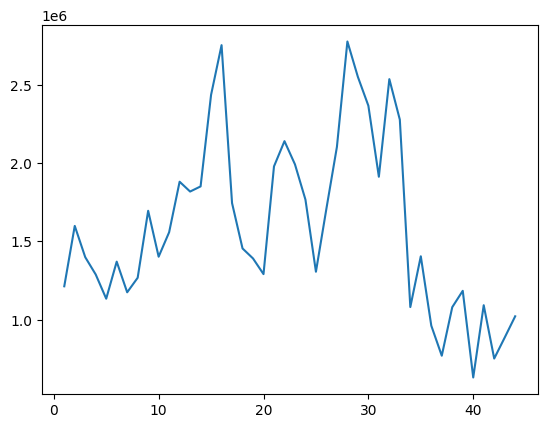

In [26]:
# Model
grouped_aya = df_grouped_taring.copy()
numbers = list(range(1, 45)) # ay sırasını temsilen yapılan numaralandırma
grouped_aya = grouped_aya.assign(numbers=numbers)

grouped_aya = grouped_aya[["numbers", "tutar"]]
grouped_aya.rename(columns={"numbers": "ay_no", }, inplace=True)

grouped_ayac = grouped_aya.copy()

x = grouped_aya["ay_no"].to_numpy()
y = grouped_aya["tutar"].to_numpy()

plt.plot(x,y)
plt.show()

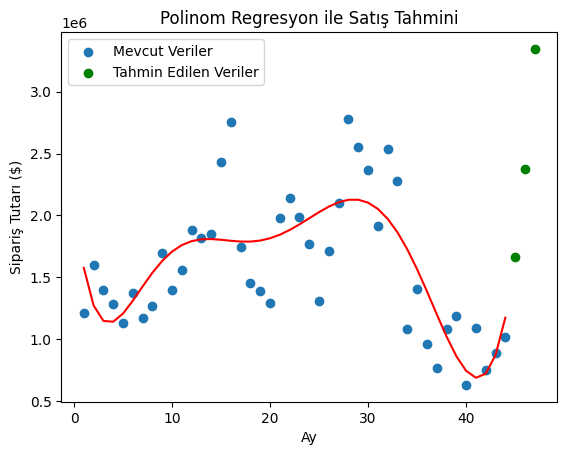

In [27]:
# Reshape
x = x.reshape(44,1)
y= y.reshape(44,1)

# model- tahmin
tahminpolinom = PolynomialFeatures(degree=7)
Xyeni = tahminpolinom.fit_transform(x)

polinommodel = LinearRegression()
polinommodel.fit(Xyeni, y)

x_tahmin = np.array([45, 46, 47])
Xyeni_tahmin = tahminpolinom.transform(x_tahmin.reshape(-1, 1))
y_tahmin = polinommodel.predict(Xyeni_tahmin)

# Modelin görselleştirilmesi
plt.scatter(x, y, label='Mevcut Veriler')
plt.scatter(x_tahmin, y_tahmin, color='green', label='Tahmin Edilen Veriler')  # x_tahmin ve y_tahmin'i ekleyin

plt.plot(x, polinommodel.predict(Xyeni), color='red')
plt.title("Polinom Regresyon ile Satış Tahmini", fontdict={"fontsize": 12})
plt.xlabel('Ay')
plt.ylabel('Sipariş Tutarı ($)')
plt.legend()
plt.show()

In [28]:
# Hata değerleri
ycyeni = polinommodel.predict(Xyeni)
tahmin_hatasi = np.mean((y - ycyeni)**2)
r_kare = 1 - (np.sum((y - ycyeni)**2) / np.sum((y - np.mean(y))**2))
mae = np.mean(np.abs(y - ycyeni))

print("Tahmin hatası:", tahmin_hatasi)
print("R kare katsayısı:", r_kare)
print("Ortalama mutlak hata (MAE):", mae)


Tahmin hatası: 126471435203.42198
R kare katsayısı: 0.5775295528150333
Ortalama mutlak hata (MAE): 279845.59857911663


### Firma bazlı satış zaman serisi

In [29]:
# Müşteri ürün değişkeninin oluşturulması
musteriürün = df.groupby(["musteri","ürün"]).agg({"tutar": ["sum","mean","median", "std"]})
musteriürün.head()

tutar  \
                                                                            sum   
musteri                                     ürün                                  
A & A TOOL AND NAILS                        5.PLASTİĞE DİZİLİ ÇİVİLER  54210.65   
A FORGED TOOL S.A.                          1.DÜZ ÇİVİLER              29533.68   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. 1.DÜZ ÇİVİLER               4122.82   
                                            3.T.DİZ.ÇİVİLER             3547.48   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         3.T.DİZ.ÇİVİLER              304.21   

                                                                                     \
                                                                               mean   
musteri                                     ürün                                      
A & A TOOL AND NAILS                        5.PLASTİĞE DİZİLİ ÇİVİLER  18070.216667   
A FORGED TOOL S.A.                          1.DÜZ ÇİVİLER               9844.560000   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. 1.DÜZ ÇİVİLER                274.854667   
                                            3.T.DİZ.ÇİVİLER              197.082222   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         3.T.DİZ.ÇİVİLER              304.210000   

                                                                                 \
                                                                         median   
musteri                                     ürün                                  
A & A TOOL AND NAILS                        5.PLASTİĞE DİZİLİ ÇİVİLER  15785.92   
A FORGED TOOL S.A.                          1.DÜZ ÇİVİLER              10235.60   
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. 1.DÜZ ÇİVİLER                254.07   
                                            3.T.DİZ.ÇİVİLER              180.59   
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         3.T.DİZ.ÇİVİLER              304.21   

                                                                                    
                                                                               std  
musteri                                     ürün                                    
A & A TOOL AND NAILS                        5.PLASTİĞE DİZİLİ ÇİVİLER  4149.468999  
A FORGED TOOL S.A.                          1.DÜZ ÇİVİLER              8183.300213  
A.R.C. AMB. MALZ. İMAL. SAN. TİC. LTD. ŞTİ. 1.DÜZ ÇİVİLER               178.706678  
                                            3.T.DİZ.ÇİVİLER              60.165314  
ABALIOĞLU YEM SOYA TEKSTİL SAN.A.Ş.         3.T.DİZ.ÇİVİLER                    NaN

#### 1- PRIMESOURCE BUILDING PRODUCTS,INC.

In [30]:
# dfprime değişkeninin oluşturulması
dfprime = df[df["musteri"] == "PRIMESOURCE BUILDING PRODUCTS,INC."]
dfprime = dfprime[["ürün", "tarih", "kg", "tutar"]]

# ürün istatiksel bilgiler
dfprime.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]})


tutar                                      
                                  sum          mean    median           std
ürün                                                                       
3.T.DİZ.ÇİVİLER            1997756.18  10570.138519   8821.98   8974.173408
5.PLASTİĞE DİZİLİ ÇİVİLER  5046492.16  17282.507397  18982.78  10137.549048

In [31]:
# PRIMESOURCE grafiği
df_groupedpr = dfprime.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_groupedpr, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'PRIMESOURCE BUILDING PRODUCTS INC. ', 'x': 0.5},legend_title=None)
fig.show()

#### 2- METROPOLITAN STAPLE CORP.

In [32]:
# dfmetro değişkeninin oluşturulması
dfmetro = df[df["musteri"] == "METROPOLITAN STAPLE CORP."]
dfmetro = dfmetro[["ürün", "tarih", "kg", "tutar"]]

# dfmetro istatiksel bilgiler
dfmetro.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                    
                                  sum         mean    median          std
ürün                                                                     
3.T.DİZ.ÇİVİLER            5407295.17  8583.008206  5463.335  8761.265462
5.PLASTİĞE DİZİLİ ÇİVİLER    79824.23  2660.807667  1458.415  2924.811312
1.DÜZ ÇİVİLER                 5087.76  1695.920000  1640.660  1008.496118

In [33]:
# METROPOLITAN grafiği
df_groupeda = dfmetro.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_groupeda, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'METROPOLITAN STAPLE CORP.', 'x': 0.5},legend_title=None)
fig.show()

#### 3- MADERAS VICENTE CASTILLO E HIJOS, S.L.

In [34]:
# dfmaderas değişkeninin oluşturulması
dfmaderas = df[df["musteri"] == "MADERAS VICENTE CASTILLO E HIJOS, S.L."]
dfmaderas = dfmaderas[["ürün", "tarih", "kg", "tutar"]]

#dfmaderas istatiksel bilgiler
dfmaderas.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                     
                        sum         mean    median           std
ürün                                                            
2.OVALI ÇİVİLER  2321322.21  7392.745892  4308.480   8126.029876
3.T.DİZ.ÇİVİLER  1156549.41  8261.067214  2304.650  12447.623088
1.DÜZ ÇİVİLER     225026.83  9376.117917  8753.775   9148.612463

In [35]:
# MADERAS VICENTE grafiği
df_grouped = dfmaderas.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'MADERAS VICENTE CASTILLO E HIJOS, S.L.', 'x': 0.5},legend_title=None)
fig.show()

#### 4- SHANDEX CO.

In [36]:
# dfshandex değişkeninin oluştrulması
dfshandex = df[df["musteri"] == "SHANDEX CO."]
dfshandex = dfshandex[["ürün", "tarih", "kg", "tutar"]]

#dfshandex iatatiksel bilgiler
dfshandex.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                       
                                  sum          mean     median           std
ürün                                                                        
3.T.DİZ.ÇİVİLER            1160827.52  14882.404103  10137.165  12032.504290
5.PLASTİĞE DİZİLİ ÇİVİLER   793387.59  11841.605821   9828.000   6830.461653

In [37]:
# dfshandex grafiği
df_grouped = dfshandex.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'SHANDEX CO.', 'x': 0.5},legend_title=None)
fig.show()

#### 5- AGLOLAK, S.L.

In [38]:
# dfaglolak değişkeninin oluşturulması
dfaglolak = df[df["musteri"] == "AGLOLAK, S.L."]
dfaglolak = dfaglolak[["ürün", "tarih", "kg", "tutar"]]

#dfmaderas iatatiksel bilgiler
dfaglolak.groupby("ürün").agg({"tutar": ["sum","mean","median", "std"]}).sort_values(by = ("tutar", "sum"),ascending= False)

tutar                                    
                        sum          mean   median          std
ürün                                                           
2.OVALI ÇİVİLER  1757766.57  10219.573081  9562.95  9019.032715

In [39]:
# dfaglolak değişkeninin oluşturulması
df_grouped = dfaglolak.groupby([pd.Grouper(key="tarih", freq="M"), "ürün"])["tutar"].sum().reset_index()

# dfaglolak grafiği
fig = px.bar(df_grouped, x="tarih", y="tutar", color="ürün", barmode="group")
fig.update_layout(title={'text': 'AGLOLAK, S.L.', 'x': 0.5},legend_title=None)
fig.show()